**Problema 6**  
Considera el archivo IBM.csv que contiene las acciones de IBM. Considera un factor de suavizado `alpha=0.01`, y grafica el promedio `ewm` para la columna `"open"`, junto con los valores reales en esa columna.  
Tu tarea es muestrear hacia abajo la columna `"Close"` a periodos mensuales usando valores promedio. Finalmente, grafica la serie resultante.

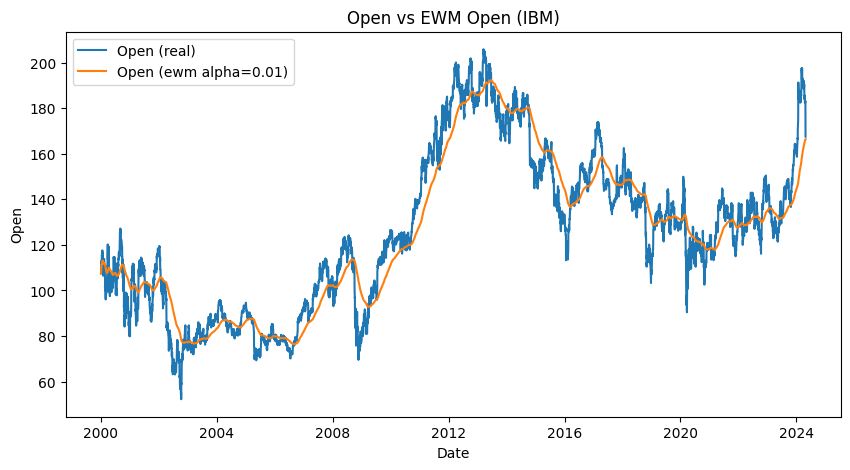

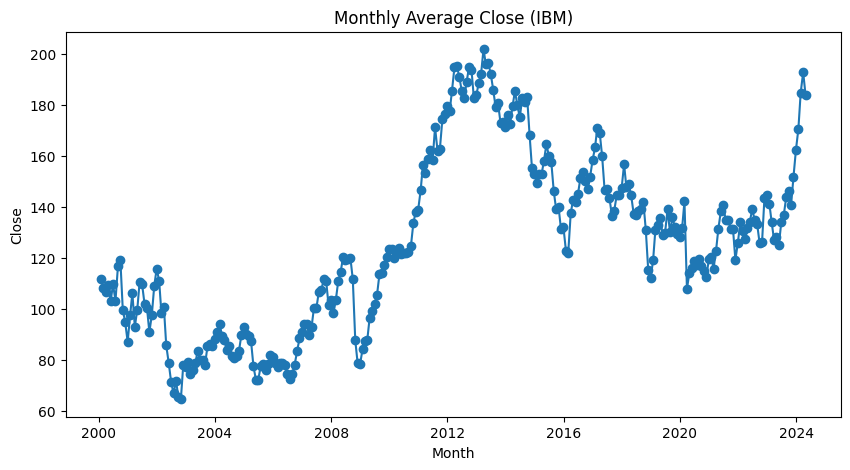

In [3]:
## Solución Problema 6

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("IBM.csv", parse_dates=["Date"], index_col="Date")

# Calcular el promedio exponencialmente ponderado (ewm) para la columna "Open"
ewm_open = df["Open"].ewm(alpha=0.01).mean()

# Graficar los valores reales y el promedio ewm
plt.figure(figsize=(10,5)) # Ajustar el tamaño de la figura
plt.plot(df["Open"], label="Open (real)") # Graficar la serie original
plt.plot(ewm_open, label="Open (ewm alpha=0.01)") # Graficar la serie ewm
plt.legend() # Añadir leyenda
plt.xlabel("Date") # Etiqueta del eje x
plt.ylabel("Open") # Etiqueta del eje y
plt.title("Open vs EWM Open (IBM)") # Título de la gráfica
plt.show() # Mostrar la gráfica

# Muestrear hacia abajo la columna "Close" a periodos mensuales usando el promedio
monthly_close = df["Close"].resample("M").mean()

# Graficar la serie resultante
plt.figure(figsize=(10,5))
plt.plot(monthly_close, marker='o')
plt.title("Monthly Average Close (IBM)")
plt.xlabel("Month")
plt.ylabel("Close")
plt.show()


**Problema 7**  
Considera la imagen `sudoku.png` adjunta a este cuaderno.  
Escribe una función `image_object_count` que tome un argumento `file_in` y devuelva el número de objetos en la imagen.

In [1]:
## Solución Problema 7
import cv2 # Importar OpenCV
import numpy as np # Importar NumPy

def image_object_count(file_in):
    # Leer la imagen en escala de grises
    img = cv2.imread(file_in, cv2.IMREAD_GRAYSCALE)
    # Umbral adaptativo para binarizar
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    # Eliminar líneas gruesas de la cuadrícula con apertura morfológica
    kernel = np.ones((3,3), np.uint8) # Crear un kernel de 3x3
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    # Encontrar contornos
    contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Filtrar contornos por área (ajusta estos valores según el tamaño de los números)
    objetos = [cnt for cnt in contours if 50 < cv2.contourArea(cnt) < 1500]
    return len(objetos)

In [2]:
# Ejemplo de uso:
n = image_object_count("sudoku.png")
print("Número de objetos:", n)

Número de objetos: 37
